<a href="https://colab.research.google.com/github/gitakartika/related-projects/blob/master/Customer%20Segmentation%20Analysis%20and%20Product%20Recommender%20System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Application of Data Science Intern


---


Gita Kartika Suriah

# *Introduction*

---
This project is about exploring the data and choose a topic to focus, which I choose product recommendation. First, I am going to analyse the data before I explore on product recommendation. 


---



This are the package used for the program below.

In [0]:
pip install cleantext

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopy
import folium
from sklearn.preprocessing import StandardScaler
from geopy.geocoders import Nominatim, GoogleV3
from folium.plugins import MarkerCluster
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from textblob import TextBlob
import re
import nltk
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from cleantext import clean as cleaner
from sklearn.decomposition import TruncatedSVD

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


The following program are used to load the data set into five different variabels.

In [0]:
geo = pd.read_csv('/content/drive/My Drive/geolocation_olist_public_dataset.csv')
order = pd.read_csv('/content/drive/My Drive/olist_public_dataset_v2.csv')
cust = pd.read_csv('/content/drive/My Drive/olist_public_dataset_v2_customers.csv')
pay = pd.read_csv('/content/drive/My Drive/olist_public_dataset_v2_payments.csv')
trans = pd.read_csv('/content/drive/My Drive/product_category_name_translation.csv')

# *I. Geo Location Exploration*

---


At this section, i would like to explore the market and its customer in geological approach.

### *1) Market Distribution*


---


Before we analyze the distribution of market location, we need to process the geo dataset. As we have seen from the dataset above, one zip_code_prefix may contain several different latitudes and longitudes. Since there is big amount of data, it would be better to group each zip code and define its langitude and longitude based on each zip code center as shown below. The count column define number of different position for each zip code.


First, I am gonna explore the geo dataset.

In [0]:
geo.head()

,zip_code_prefix,city,state,lat,lng
0,10,sao paulo,sp,-23.547807,-46.636122
1,10,sao paulo,sp,-23.546081,-46.644820
2,10,sao paulo,sp,-23.540984,-46.642569
3,10,sao paulo,sp,-23.546758,-46.645771
4,10,sao paulo,sp,-23.546362,-46.643073


Before going any further, it seems that geo dataset contain several duplicates. Therefore, we gonna need to drop it first.

In [0]:
geo = geo.drop_duplicates(subset=None, keep='first', inplace=False)

In [0]:
centroid = geo.groupby('zip_code_prefix').agg({
    'lat': 'median',
    'lng': 'median',
    'city': pd.Series.mode
}).reset_index()
centroid['count'] = geo.groupby('zip_code_prefix').size().reset_index(
    name='counts')['counts']

The following map are the distribution of the market at Brazil:

In [0]:
import plotly
import plotly.express as px

token = 'pk.eyJ1IjoiZmFhdGhpcjk4IiwiYSI6ImNrMGVxMTl5dzBiZHYzYm1wMm15b2RhcXQifQ.InHG7-SGeNMtnnfkvIVCRg'
fig = px.scatter_mapbox(centroid,
                        lat="lat",
                        lon="lng",
                        size="count",
                        color="count",
                        size_max=8,
                        color_continuous_scale=px.colors.sequential.Redor,
                        zoom=2.7)
fig.update_layout(mapbox_style="outdoors", mapbox_accesstoken=token)
fig.show()

As we can see, the market distributed highly at south Brazil approximately around lat: -22 and lng: -46. Therefore, I suggest for the market distribution to be balanced. Moreover, if the company interested in expand the market to international, it is highly recommended to expand the market at north and west 
Brazil since there is only a few market around to focus on company's branding.  

## 2) *Revenue Distribution*


---

To explore the distribution of product revenue, we need to process the order dataset and clean the data from duplicate. However, the position for each order are contained on the geo dataset. Therefore, we need to join both dataset based on order id column.

In [0]:
order.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_id,customer_city,customer_state,customer_zip_code_prefix,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,297dcf281305aabfee256d313076af2b,Guaratuba,PR,832,beleza_saude,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,b7563d94162ed0aa3f8d9cada4bcc536,Uberlandia,MG,384,informatica_acessorios,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,f102cb15ec41ca30fa2902da06495f6b,Itapevi,SP,66,automotivo,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,e33c250311160298e5b457ca52720a35,Goiania,GO,743,cama_mesa_banho,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,8a8f7c9a4450f17ba3ee25a5ba821bc7,Recife,PE,511,moveis_decoracao,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


In [0]:
order = order.drop_duplicates(subset=None, keep='first', inplace=False)

In [0]:
geo_order = pd.merge(centroid,
                     order,
                     how='right',
                     left_on='zip_code_prefix',
                     right_on='customer_zip_code_prefix')

Same as the previous part, the dataset is grouped by customer zip code and for each group contain the sum of value ordered products.

In [0]:
geo_rev = geo_order.groupby('customer_zip_code_prefix').agg({
    'lat':
    'median',
    'lng':
    'median',
    'order_products_value':
    'sum'
}).reset_index()

The following map are the distribution of the purchased procuts at Brazil:

In [0]:
import plotly.graph_objects as go
fig = go.Figure(
    go.Densitymapbox(lat=geo_rev.lat,
                     lon=geo_rev.lng,
                     z=geo_rev.order_products_value,
                     radius=10))
fig.update_layout(mapbox_style="stamen-terrain",
                  mapbox_center_lon=-50,
                  mapbox_center_lat=-16,
                  mapbox_zoom=2.7)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

As shown the map above, we can conclude there are three main hotspots which located at approximately:

1.   lat:-24, lng:-46
2.   lat:-22, lng:-43
3. lat:-19, lng:-43

These three places are the market with highest revenue. To raise company's revenue, it is highly recommended to add more market around these three hotspots since there's a lot of customer gladly spending their money there.



# *3) Customer Distribution*
The same method is used to find the central of each zip code, additonally with defining number of customer id as count.

In [0]:
geo_order = geo_order.dropna(subset=['zip_code_prefix'])
geo_cust = geo_order.groupby('customer_zip_code_prefix').agg({
    'lat':
    'median',
    'lng':
    'median',
    'customer_id':
    'count'
}).reset_index()

The following map are the distribution of the customer products at Brazil:

In [0]:
import plotly.graph_objects as go
fig = go.Figure(
    go.Densitymapbox(lat=geo_cust.lat,
                     lon=geo_cust.lng,
                     z=geo_cust.customer_id,
                     radius=10))
fig.update_layout(mapbox_style="stamen-terrain",
                  mapbox_center_lon=-50,
                  mapbox_center_lat=-16,
                  mapbox_zoom=2.7)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

As shown above, there are three main hotspots with highest number of customer. These hotspots are located at approximately:


1.   lat:-23, lng:-46
2.   lat: -22, lng:-43
3.   lat: -19, lng:-43

Note that the location of these hotspots approximately near with the previous hotspots, so we can assume that these hotspots are simmiliarly the same. With higher number of customer, these places would great place to expand your market because of customer's interest with this market.


---
# *Conclusion*

In this geological approach, there are a few things i would like to recommend:


1.   For **branding expansion**, it is best for the company to expand the market at **the west and north Brazil**. However, with low income from these location, it would be better to **build only a few market** for each city or area since the interest of the customer is currently low.
2.   For **increase in revenue**, it is best for the company to expand the market at these three hotspots:
  1.  **lat:-23, lng:-46**
  2.  **lat: -22, lng:-43**
  3.   **lat: -19, lng:-43**

Since these hotspots have highest number of customer and revenue, it shows that the customer around these hotspots interested with the market. 




# II. Time Period Exploration


---


At this section, I would like to explore the market and customer interest based on timing approach.

## 1) *Accuracy of Delivery Estimation*


---


This section will analyze the accuracy that company estimate for delivery time. Moreover, I will divide the case when the delivery is late and early. We will start by cleaning the data by changing the variable type of delivery date and estimated date to datetime type.

In [0]:
geo_order['order_delivered_customer_date'] = pd.to_datetime(
    geo_order['order_delivered_customer_date'])
geo_order['order_estimated_delivery_date'] = pd.to_datetime(
    geo_order['order_estimated_delivery_date'])

Since the order can be canceled after the purchase, there are empty element on delivery date column. Therefore, we will drop the empty column.

In [0]:
geo_order = geo_order.dropna(subset=['order_delivered_customer_date'])

Next, we will find the range time from the estimated delivery date and the delivery date, which measured on day.

In [0]:
geo_order['range_time'] = (
    geo_order['order_delivered_customer_date'] -
    geo_order['order_estimated_delivery_date']).astype('timedelta64[D]')

Furthermore, we define which customer got the product early and delayed. Since we define it as time interval, we absolute the negative time on early variables.

In [0]:
delay = geo_order['range_time'][geo_order['range_time'] > 0]
early = abs(geo_order['range_time'][geo_order['range_time'] < 0])

### *A. Early Delivery Exploration*


---

First, we divide the early dataset into five categories.

In [0]:
bins = [0, 3, 7, 14, 30, 90]
labels = [
    '1-3 days', '4-7 days', '7-14 days', '14-30 days', 'More than 1 month'
]
early = pd.cut(early, bins=bins, labels=labels)

The following bar chart is the number of customer got an early delivery categorized by how long it is early.

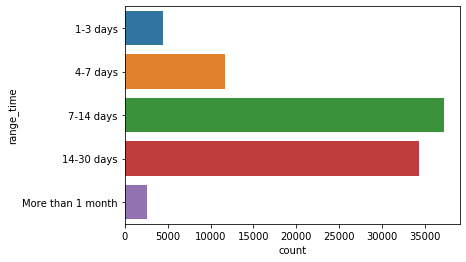

In [0]:
sns.countplot(y=early)

It is shown above, that the early delivery mainly in 7-14 days and 14-30 days. However, even it is might be good for the customer to got an early delivery, it also shows the high inaccuracy of the delivery estimation. This issue also can impacting customer to consider cancel the order due to longer estimated delivery date.

### B) *Delay Delivery Estimation*

---

Same as the section above, we divide the delay dataset into six categories.

In [0]:
bins = [0, 3, 7, 14, 30, 90, 300]
labels = [
    '1-3 days', '4-7 days', '7-14 days', '14-30 days', '1-3 month',
    'More than 3 months'
]
delay = pd.cut(delay, bins=bins, labels=labels)

The following bar chart is the number of customer got an delay delivery categorized by how long it is early.

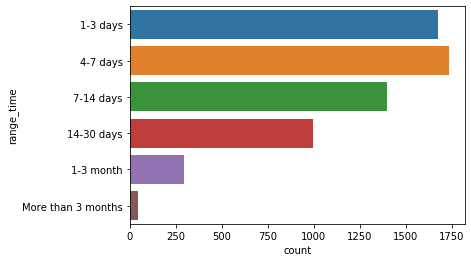

In [0]:
sns.countplot(y=delay)

It is shown above, that the delivery delay mainly in 4-7 days and 1-3 days. This is could be company consideration to check the delivery estimator, since there is a lot day customer in 4-7 days. Moreover, there are some delayed delivery above 1 month, this would reduce customer satisfaction significanlly.



---


Next, we will see which location has high rates of delayed delivery. We will define delay default is 1 if it is delayed and 0 if it is not.

In [0]:
geo_order['range_time_default'] = geo_order['range_time'].apply(
    lambda x: 1 if x > 0 else 0)

Furthermore, we will group the dataset based on zip code and determine the center of each zip code with addition mean of range time default for each center zip code area.

In [0]:
delay_place = geo_order.groupby('zip_code_prefix').agg({
    'lat':
    'median',
    'lng':
    'median',
    'range_time_default':
    'mean'
})

The following map plot show the high rate delayed delivery area. 

In [0]:
fig = go.Figure(
    go.Densitymapbox(lat=delay_place.lat,
                     lon=delay_place.lng,
                     z=delay_place.range_time_default,
                     radius=10))
fig.update_layout(mapbox_style="stamen-terrain",
                  mapbox_center_lon=-50,
                  mapbox_center_lat=-16,
                  mapbox_zoom=2.8)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

As shown above, there are five hotspots with high rates of delayed delivery, which located at:


1.   lat:-22, lng:-43
2.   lat:-23, lng:-46
3.   lat:-8, lng:-35
4.   lat:-29, lng:-52
5.   lat:-12, lng:-38

These hotspots must be the company concern.

## *Conclusion*


---


Below, is percentage of early, normal, and delay delivery. 

In [0]:
normal = geo_order['range_time'][geo_order['range_time'] == 0]
print('normal:',
      round(normal.count() * 100 / geo_order['range_time'].count(),
            3), '%', '\nearly:',
      round(early.count() * 100 / geo_order['range_time'].count(), 3), '%',
      '\ndelay:',
      round(delay.count() * 100 / geo_order['range_time'].count(), 3), '%')

normal: 1.259 % 
early: 92.44 % 
delay: 6.293 %


As we can see, the number of exact the percentage on early product is very high, approximately 92,5%. High number of early delivery might satisfy the customer, but **shows inaccuracy of delivery time estimator**. Moreover, even if the delay percentage is low, this should be the company concern since there are some order that have **delayed delivery more than one month**. As an analyst, I strongly suggest the company to **improve the delivery time estimator** since only 1% of customer predicted accurately. 

# 2) *Promotion Timing*


---

This section will analyze the best time to promote company's product or to release new product. First, we change the purchase time data type to datetime type.

In [0]:
order['order_purchase_timestamp'] = pd.to_datetime(
    order['order_purchase_timestamp'])

### A. *Best Hour*


---


Next, we take only the hour part from the purchase time.

In [0]:
best_time_hours = (order.order_purchase_timestamp).dt.hour

The following graph shows purchase time in hour.

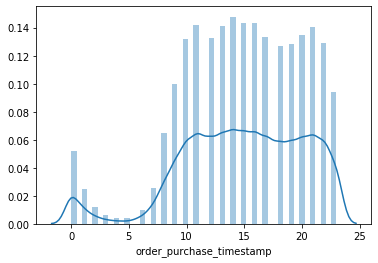

In [0]:
sns.distplot(best_time_hours)

As shown above, most of the customers purchase products around 10 am until 22 pm.

### B. *Best Day*


---

At this part, we only take the day part from each purcahse date. 

In [0]:
best_time_day = order.order_purchase_timestamp.apply(lambda x: x.weekday())

The following graph shows purchase time in day.

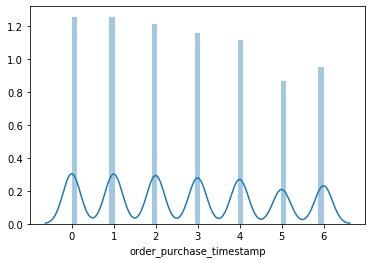

In [0]:
sns.distplot(best_time_day)

As we can see, the highest number of purchase is on Tuesday(1), then Monday(0). However, even in other days the number of purchase not significanlly low, I recommend to avoid promote products in Saturday (5), since it is the lowest.

### 3) *Best Month*


---
First, we only take the month part from each purchase date.

In [0]:
best_time_month = (order.order_purchase_timestamp).dt.month

The following graph is the purchase time in month.

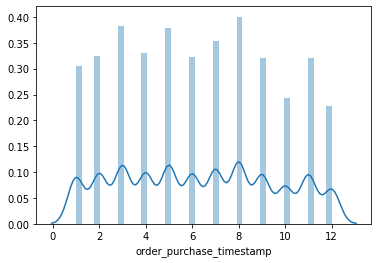

In [0]:
sns.distplot(best_time_month)

As shown above, the highest number of purchase in August (8). However, even in other days the number of purchase not significanlly low, I recommend to avoid promote products in December (12), since it is the lowest.

# *Conclusion*


---
Based on the previous analysis, I **recommend** the company to promote or release new products on:
- Hour: Around 10 am - 22 pm
- Day: Tuesday, Monday
- Month: August, February

It might be okay to promote on another time besides the time I mentioned above, since it is not significanlly different. However, there are some time with low number of purchase which the company should **avoid**:
- Hour: Around 3 am - 5 am
- Day: Saturday
- Month: December, October


# *III. Customer Behaviour Exploration*


---

This section will analyze the behaviour of customer and catagorize each customer to be paid attention furtherly. Let's look at the customer dataset.

In [0]:
cust.head()

,customer_id,customer_unique_id
0,0000ca4ff2795842fd6b122c6d974468,ac0e5d7f07043dd32831bdad3b99ad26
1,00010f206878ba01f199aec4237de72e,4ed24aaed4079fe0661c0e4b3b420dff
2,00012a2ce6f8dcda20d059ce98491703,7e0e291c0f4fc2d69208954d26ed0586
3,000161a058600d5901f007fab4c27140,ff1dcb27ea444eddb94ea5fea77b875c
4,00017f1d6cce0d56046219a2cfabcbbb,237130c4b6717031ed62d9d0b16fd94f


To reduce error, it would be best to drop duplicates.

In [0]:
cust = cust.drop_duplicates(subset=None, keep='first', inplace=False)

The following program will catagorize customer based on recency, frequency, monetary, and tenure. It seems that we need order dataset, so we need to join cust and order dataset based on customer id.

In [0]:
order_cust = pd.merge(cust,
                      order,
                      how='right',
                      left_on='customer_id',
                      right_on='customer_id')

Next, to define recency, we need to find the range of time from latest purchase to each purchase time on the dataset. Moreover, we define recent as the latest time each customer purchase at this market. 

In [0]:
order_cust = order_cust.dropna(subset=['order_aproved_at'])
order_cust['order_aproved_at'] = pd.to_datetime(order_cust['order_aproved_at'])
order_cust['latest'] = max(order_cust.order_aproved_at)
order_cust[
    'range_time'] = order_cust['latest'] - order_cust['order_aproved_at']
recent = order_cust.groupby('customer_unique_id').agg({
    'range_time': 'min'
}).astype('timedelta64[D]')

After that, we define frequent by summing up ordered items of each customer.

In [0]:
frequent = order_cust.groupby('customer_unique_id').agg(
    {'order_items_qty': 'sum'})

 To define monetary we sum up ordered items values of each customer.

In [0]:
monetary = order_cust.groupby('customer_unique_id').agg(
    {'order_products_value': 'sum'})

Next, we define tenure by find the earliest purchase time from each customer.

In [0]:
tenure = order_cust.groupby('customer_unique_id').agg({
    'range_time': 'max'
}).astype('timedelta64[D]')

Below, we concatenate the criteria into table.

In [0]:
rfmt = pd.concat([recent, frequent, monetary, tenure], axis=1)
rfmt.columns = ['recency', 'frequency', 'monatary', 'tenure']

This is the description of each criteria.

In [0]:
rfmt.describe()

,recency,frequency,monatary,tenure
count,92499.000000,92499.000000,92499.000000,92499.00000
mean,307.114390,1.189094,139.651706,310.23637
std,157.680732,0.668378,212.647446,157.82497
min,0.000000,1.000000,2.000000,0.00000
25%,188.000000,1.000000,49.000000,191.00000
50%,305.000000,1.000000,89.900000,307.00000
75%,428.000000,1.000000,155.420000,432.00000
max,742.000000,25.000000,14776.000000,742.00000


Next, we want to rank each customer for each criteria. There will be rank 1 to 5, with rank 1 as the highest and rank 5 as the lowest.

In [0]:
label1 = [5, 4, 3, 2, 1]
label2 = [1, 2, 3, 4, 5]
rfmt['R'] = pd.qcut(rfmt['recency'],
                    q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                    labels=label1)
rfmt['F'] = pd.cut(rfmt['frequency'], bins=[0, 1, 2, 3, 5, 900], labels=label2)
rfmt['M'] = pd.qcut(rfmt['monatary'],
                    q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                    labels=label2)
rfmt['T'] = pd.qcut(rfmt['tenure'],
                    q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                    labels=label2)

In [0]:
rfmt = rfmt.reset_index()

In [0]:
best = rfmt[rfmt.R.isin([4, 5]) & rfmt.F.isin([4, 5]) & rfmt.M.isin([4, 5])]
best['segment'] = 'BEST'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
loyal_spender = rfmt[rfmt['R'].isin([4, 5]) & rfmt['F'].isin([2, 3])
                     & rfmt['M'].isin([2, 3]) & rfmt['T'].isin([3, 4, 5])]
loyal_spender['segment'] = 'LOYAL SPENDER'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
potential_loyal = rfmt[rfmt['R'].isin([4, 5]) & rfmt['F'].isin([2, 3])
                       & rfmt['M'].isin([2, 3]) & rfmt['T'].isin([1, 2])]
potential_loyal['segment'] = 'POTENTIAL LOYAL'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
new_cust = rfmt[rfmt['R'].isin([4, 5]) & rfmt['F'].isin([1])
                & rfmt['M'].isin([1]) & rfmt['T'].isin([1, 2])]
new_cust['segment'] = 'NEW CUSTOMER'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
loyal_cust = rfmt[rfmt['R'].isin([4, 5]) & rfmt['F'].isin([1])
                  & rfmt['M'].isin([1]) & rfmt['T'].isin([3, 5])]
loyal_cust['segment'] = 'LOYAL CUSTOMER'

In [0]:
promising = rfmt[rfmt['R'].isin([2, 3]) & rfmt['F'].isin([3, 5])
                 & rfmt['M'].isin([3, 5])]
promising['segment'] = 'PROMISING'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
cant_lose = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([4, 5])
                 & rfmt['M'].isin([4, 5])]
cant_lose['segment'] = 'CAN NOT LOSE'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
about_to_sleep = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([4, 5])
                      & rfmt['M'].isin([4, 5])]
about_to_sleep['segment'] = 'ABOUT TO SLEEP'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
hibernating = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([2, 3])
                   & rfmt['M'].isin([2, 3])]
hibernating['segment'] = 'HIBERNATING'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
lost = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([1]) & rfmt['M'].isin([1])
            & rfmt['T'].isin([1])]
lost['segment'] = 'HIBERNATING'

In [0]:
rfmt_segment = pd.concat([
    best, loyal_spender, potential_loyal, new_cust, loyal_cust, promising,
    cant_lose, about_to_sleep, hibernating, lost
])

In [0]:
rfmt_segment.sample(10)

,customer_unique_id,recency,frequency,monatary,tenure,R,F,M,T,segment
23975,4207eceb64e0b5cbe944f74c11e33b77,174.0,1,34.20,174.0,4,1,1,2,NEW CUSTOMER
44335,7a7207e56b0a64f140c3339d04079b62,241.0,6,445.35,261.0,4,5,5,2,BEST
74571,ce729cfb71c13df61fa0f9b7377307a1,717.0,2,101.80,717.0,1,2,3,5,HIBERNATING
1419,03e2f621867dd4fd68fa280f287e6c2a,84.0,1,28.90,84.0,5,1,1,1,NEW CUSTOMER
21631,3b942bf47bcfe47e5bde9c62f1ade695,336.0,3,347.97,336.0,3,3,5,3,PROMISING
60092,a64977f9042f70d4c592041a1c9aa9a7,457.0,3,89.97,457.0,2,3,3,4,PROMISING
81086,e06b2b3fb1c6125d334bf6b23bfa4b36,349.0,3,329.80,406.0,3,3,5,4,PROMISING
17458,30558441570e00d799b3addcc7179455,144.0,1,18.90,144.0,5,1,1,1,NEW CUSTOMER
569,01903d2d8953ff36a7e386856219a205,224.0,2,99.80,224.0,4,2,3,2,POTENTIAL LOYAL
39329,6c8068d86e4273690959d7e42665d84b,358.0,3,268.47,358.0,2,3,5,4,PROMISING


I am gonna give suggestion for each category of customer.
### i. <em>Best Customer</em>

---
For this category, to keep this customer interest with your company, It is recommended to **give award for any purchased product**, such as **point** that may interest them to buy things at your company. This point can be exhange with **discount** or any other things that may interest them.  

### ii. <em>Loyal Spender</em>

---
Same as previous category, to keep the customer spending on your company, you can **give points for particular purchase**. With particular point accumulation, they can **ranked up** to 'best customer' category. 

### iii. <em>Potential Loyal</em>

---
Same as previous category, this kind of customer which new customer with frequent purchase. To keep the customer spending on your company, you can **give points** for every purchase. With particular point accumulation, they can **ranked up to 'loyal spender'** category, before they grow interest to another company. 

### iv. <em>New Customer</em>

---
For new customer, we do not really understand their behaviour. Therefore, the company may **promote things** that interest this customer from their previous purchase. 

### v. <em>Loyal Customer</em>

---
This customer have been loyal to the company.However, this customer better to be appriciated, I suggest the company may **give** this customer **few incentive**.

### vi. <em>About To Sleep</em>

---
This customer have frequently purchased at this company. However, it is been a long time since this customer purchased at this company. I recommend the company to **promote the company or the product** to notify this customer to shop more at this company.

### vii. <em>Can Not Lose Them & Hibernating</em>

---
The customer not so different with the previous category. However, this customer may not visit the website or application of this company longer. Therefore, it might be better for the company to **promote** its company or product by **sending it to the email** of the customer.

### viii. <em>Lost</em>

---
For this kind of customer, the customer is too far to approach because of lack interest at this company. So, I suggest to **not promote** the company to this category of customer, since the **customer have already lost** and **cost of promotion** to get them back will be **high.**

---
# *Conclusion*

---
I recommend to take appropriate **marketing action** based on the **segment of customer** to keep them enganged and keep generating profit.

# *IV. Product Exploration*


---
At this section, we will explore the product from the market.

## 1) *Popularity Analysis*
This section will focus on exploring the popularity of product. Before we analyze, let's take a look at product translation dataset.

In [0]:
trans.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


I would like to translate the product category from portugese to english. So, I will join the order and trans dataset based on product category name.

In [0]:
order_trans = pd.merge(trans,
                       order,
                       how='right',
                       on=['product_category_name', 'product_category_name'])
order_en = order_trans.drop(['product_category_name'], axis=1)

We can see below is the joined dataset, with english translation for product category.

In [0]:
order_en.head()

,product_category_name_english,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_id,customer_city,customer_state,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,health_beauty,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,297dcf281305aabfee256d313076af2b,Guaratuba,PR,832,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,health_beauty,e98077a0d199a25a40eab3b14cc230d4,delivered,39.99,15.23,1,2,2018-04-17 13:25:36,2018-04-18 13:31:35.349522,2018-05-10 00:00:00.000000,2018-04-27 20:56:32.787589,5161d5feec98ade754f67746caf8e0c9,BRASILIA,DF,724,51,405,2,190d9562bfbe9d3ed876c2ac6f2f5894,e98077a0d199a25a40eab3b14cc230d4,5,NaN,NaN,2018-04-28 00:00:00.000000,2018-04-29 21:07:53+00:00
2,health_beauty,8a723730400b508cbf47fbef4a76ec8e,delivered,60.00,20.91,1,1,2018-02-18 12:41:01,2018-02-18 13:46:36.606696,2018-03-14 00:00:00.000000,2018-03-03 02:48:53.603256,f19376e0c54da9409485f7ef9556d367,Belo Horizonte,MG,308,38,1665,1,5858f45c20fde7d7e49af37a2166635a,8a723730400b508cbf47fbef4a76ec8e,5,NaN,muito bom cabelo fica lisinho,2018-03-04 00:00:00.000000,2018-03-07 02:53:50+00:00
3,health_beauty,cf71b9b6b7ed12d72f541b0420023f19,delivered,79.99,10.94,1,1,2018-05-09 23:33:28,2018-05-11 02:57:52.916830,2018-05-24 00:00:00.000000,2018-05-17 22:31:58.137648,12698ad9da6b62003811594de0ae297e,Cachoeiro de Itapemirim,ES,293,59,492,3,2b4609f8948be18874494203496bc318,cf71b9b6b7ed12d72f541b0420023f19,4,Bom,gostei,2018-05-18 00:00:00.000000,2018-05-20 19:47:57+00:00
4,health_beauty,93ef9253c47e7dfc633c01f728488cb1,delivered,58.99,11.73,1,1,2017-10-26 09:07:04,2017-10-27 09:15:12.032978,2017-11-09 00:00:00.000000,2017-10-31 16:09:47.272654,ba21875fac3c41b6ac433113cf862e55,Maua,SP,93,59,492,2,7c1bd920dbdf22470b68bde975dd3ccf,93ef9253c47e7dfc633c01f728488cb1,4,NaN,NaN,2017-11-01 00:00:00.000000,2017-11-03 20:37:36+00:00


The following bar chart shows percentage of each rating for overall products.

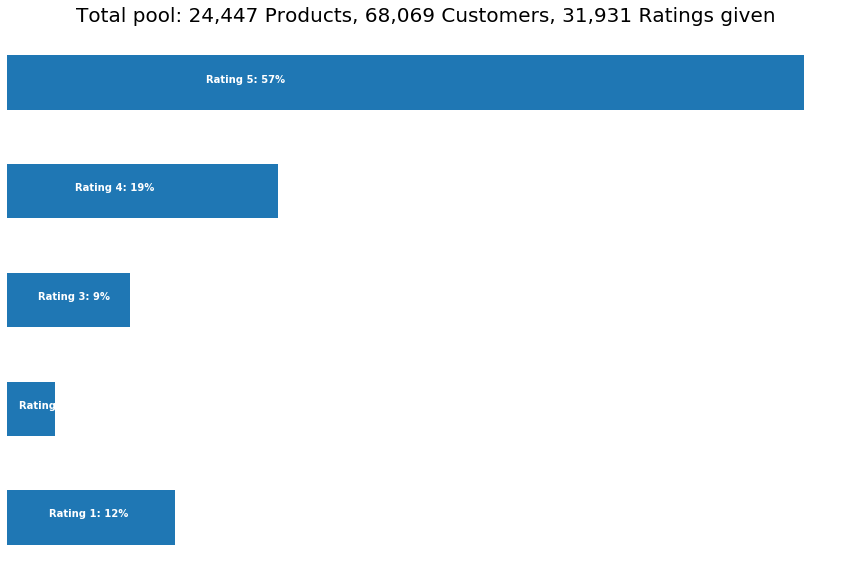

In [0]:
n = order_en.groupby('review_score')['review_score'].agg(['count'])

prod_count = order_en['product_id'].nunique()

cust_count = cust['customer_unique_id'].nunique() - prod_count

rating_count = order_en['review_score'].count() - cust_count

ax = n.plot(kind='barh', legend=False, figsize=(15, 10))
plt.title(
    'Total pool: {:,} Products, {:,} Customers, {:,} Ratings given'.format(
        prod_count, cust_count, rating_count),
    fontsize=20)
plt.axis('off')

for i in range(1, 6):
    ax.text(n.iloc[i - 1][0] / 4,
            i - 1,
            'Rating {}: {:.0f}%'.format(i,
                                        n.iloc[i - 1][0] * 100 / n.sum()[0]),
            color='white',
            weight='bold')

As we can see, it is actually excellent to have 57% of the products is rated 5. However, the rate 1: 12% percentage is quite high compared to rate 2 and 3.


---



We'll take a look at the most popular product category, and we'll measure it by how many reviews has been submitted at each product category

In [0]:
pop_prod = pd.DataFrame(
    order_en.groupby('product_id')['review_score'].count())
most_popular = pop_prod.sort_values('review_score', ascending=False)
most_popular.head(10)

,review_score
product_id,
99a4788cb24856965c36a24e339b6058,653
aca2eb7d00ea1a7b8ebd4e68314663af,615
422879e10f46682990de24d770e7f83d,475
d1c427060a0f73f6b889a5c7c61f2ac4,449
389d119b48cf3043d311335e499d9c6b,435
53759a2ecddad2bb87a079a1f1519f73,432
53b36df67ebb7c41585e8d54d6772e08,427
368c6c730842d78016ad823897a372db,380
2b4609f8948be18874494203496bc318,368


It would be easier if we show it in the bar chart, as shown below.

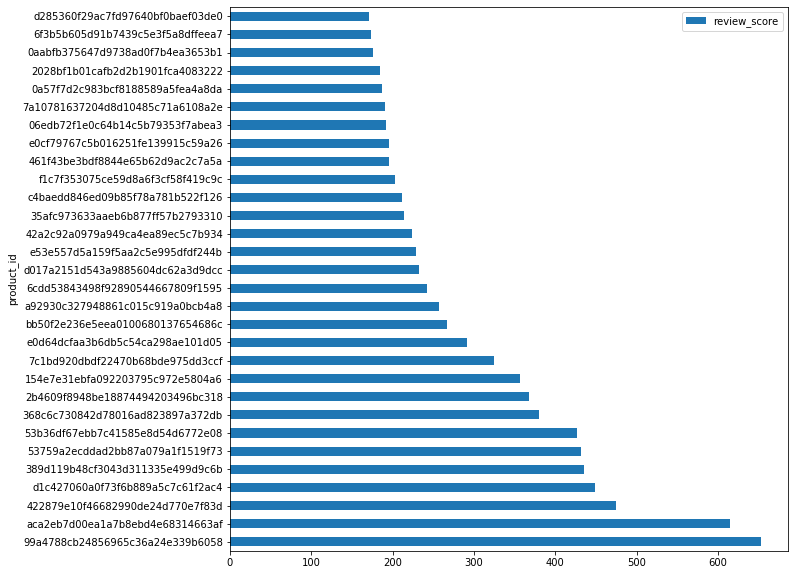

In [0]:
plt.rcParams['figure.figsize'] = (10, 10)
most_popular.head(30).plot(kind="barh")

From the bar chart above, we can conclude that product with product id: '99a4788cb24856965c36a24e339b6058' is the most popular. This product has highest review score, this score may be different for each person (might be high or low). However, we only focus on how many people reviewing this product since the score indicate the popularity.


---
#*Conclusion*
We can conclude from this analysis that product id: '99a4788cb24856965c36a24e339b6058' is the most popular product. I recommend for the company to:
1. **Not promote** this **popular product frequently** since it is already popular
2. **Promote** another product with **low score of rating** to attract customer with the product.


---

## 2) *Sentiment Analysis*
Besides the popularity, I am also considering the comment of the product. Since the comment is in portugese, it would be hard for me to analyze. Therefore, I translate the comment to english in excel and load the dataset as data.

In [0]:
data = pd.read_excel('/content/drive/My Drive/review_translate.xlsx')

Next, we need to download several dictionary needed to analyse the comment.

In [0]:
nltk.download('punkt')
nltk.download('stopwords')

Next, I am gonna analyse the sentiment of the comment of each product. However, the data is still a mess, so I am gonna clean it by removing punctuation and symbols by defining its function as clean_text.

In [0]:
default_stemmer = PorterStemmer()
default_stopwords = stopwords.words(
    'english')  # or any other list of your choice


def clean_text(text, ):
    def tokenize_text(text):
        return [w for s in sent_tokenize(text) for w in word_tokenize(s)]

    def remove_special_characters(text,
                                  characters=string.punctuation.replace(
                                      '-', '')):
        tokens = tokenize_text(text)
        pattern = re.compile('[{}]'.format(re.escape(characters)))
        return ' '.join(filter(None, [pattern.sub('', t) for t in tokens]))

    def remove_stopwords(text, stop_words=default_stopwords):
        tokens = [w for w in tokenize_text(text) if w not in stop_words]
        return ' '.join(tokens)

    text = text.strip(' ')  # strip whitespaces
    text = text.lower()  # lowercase
    text = remove_special_characters(text)  # remove punctuation and symbols
    #text.strip(' ') # strip whitespaces again?

    return text

After defining the function to clean the data, I am gonna define a function to decide the sentiment of each comment.

In [0]:
def isNaN(num):
    return num != num


def sentimen_en(text):
    if isNaN(text) == True:
        return np.nan
    else:
        hasil = TextBlob(text).sentiment[0]
        return hasil

After defining the function, let's clean the data and analyse its sentiment. 

In [0]:
data['clean'] = data['translate'].apply(lambda x: clean_text(cleaner(x)))

In [0]:
data['sentimen'] = data['clean'].apply(lambda x: sentimen_en(x))

In [0]:
mask = data['translate'].apply(lambda x: not isNaN(x))

We can see below the score of each comment from -1 to 1.

In [0]:
data[mask][['clean', 'sentimen']].sample(10)

,clean,sentimen
59436,product take long to arrive,-0.050000
67780,na £ o were delivered two leather covers only ...,0.000000
33275,super indicate product and delighted quality shop,0.516667
91029,the biggest problem was having to get the prod...,0.400000
57330,the product was entrege fast but the packaging...,0.061538
10988,very good,0.910000
9206,very good,0.910000
51601,ãºnica my complaint ã © that the product came ...,-0.233333
41008,product arrived well before the deadline,0.000000
16523,simply golden material in the £ came despite t...,0.144444


Next, we gonna need to categorize each sentiment, to decide which sentiment is positive, neutral, or negative.

In [0]:
bins = [-1, -0.3, 0.3, 1]
labels = ['negative', 'unsure', 'positive']
data['sentimen_label'] = pd.cut(data['sentimen'], bins=bins, labels=labels)

After several process, we can see the comment is categorized by the sentiment score.

In [0]:
data[mask].groupby('sentimen_label').apply(lambda x: x.sample(10))[[
    'clean', 'sentimen'
]]

clean  sentimen
sentimen_label                                                                   
negative       44385  bought 04 seats red futon on 08 11 2017 12 21 ... -0.375000
               89955  unfortunately i am ata © date awaiting the arr... -0.500000
               58234  i received a totally fake pirate packaging pro... -0.500000
               73351  within expectations despite the expensive freight -0.500000
               34696  already requested the replacement of the produ... -0.500000
               5189   it came in the wrong color ordered a color and... -0.500000
               17883  i need to carry out the exchange of a tank for... -0.400000
               5736   i signaled that stores lannister has the habit... -0.500000
               2761   bought rolls and 7 minutes ©-only the time rec... -0.400000
               74691                             shipping too expensive -0.500000
unsure         79582  efetuei buying a backpack and merchandise £ o ...  0.000000
               39178                   na £ received the luminã¡ria yet  0.000000
               57551  buy at several places always delivers on time ...  0.000000
               926    product arrived well before expected recommend... -0.100000
               67630  perfume bought two of which came a-only in the... -0.200000
               9439                                         i recommend  0.000000
               93803  there was problem in the delivery post office ...  0.000000
               6598                         delivery before term option  0.000000
               87839  i spent the address right and wrong confirmed ...  0.124490
               98030  received leave request q coast in ã © site q r...  0.075000
positive       38150       loved delivered before the required deadline  0.700000
               53083  the store baratheon estã¡ of paraba © ns the p...  0.650000
               90531                  very beautiful the watch designer  1.000000
               59951                                                 ok  0.500000
               15677  the watch is simply beautiful © bought atravã ...  0.567857
               38766  ã³timo excellent product delivery rã¡pida way ...  0.350000
               65307                                     beautiful bags  0.850000
               58101     the product ã © ã³timo the stuff ã © very good  0.910000
               64231                                i liked the product  0.600000
               76897                                very good recommend  0.910000

As the table shown above, we can see that the category is quite accurate. Moreover, we gonna analyse the negative comment further. 

In [0]:
data_sample_negative = data[mask][data['sentimen_label'] == "negative"].sample(
    1000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



To see which word or topic that connected with negative sentiment, we gonna visualize it with word cloud and see which word that describe the negative comment the most.

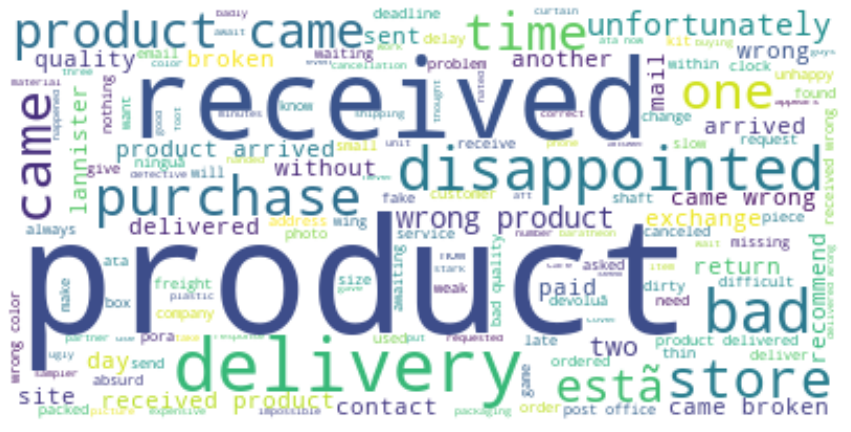

In [0]:
# Wordcloud
text = " ".join(text for text in data_sample_negative['clean'])
stopwords = set(STOPWORDS)
stopwords.update(
    ['still', 'come', 'na', 'bought', 'buy', 'made', 'got', 'base',
     'already'])  #Adding Stopword

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.rcParams["figure.figsize"] = (15, 8)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the wordcloud above, we can analyse that most of negative comments are about the product, delivery, store, etc. This could be the company feedbacks to improve the company, especially in products, delivery, and store.


---
# *Conclusion*

By analyzing the sentiment of the comment, this can be the company consideration to improve their market. Since I only focusing on the negative sentiment, I recommend for the company to:
- Take a look at the **quality of the product** since it is the most customer concern
- Check your **delivery performence** since it is the second most customer concern
- Pay attention on the **store**, it may has **problems** since the customer mentioned it frequently. 


#Main Focus: *Product Recommendation System*


---

At this section, we want to make a recommendation system for the product. If we input a product ID number, this system will recomend product for this customer.
First, we gonna look at the order dataset.

In [0]:
order.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_id,customer_city,customer_state,customer_zip_code_prefix,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,297dcf281305aabfee256d313076af2b,Guaratuba,PR,832,beleza_saude,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,b7563d94162ed0aa3f8d9cada4bcc536,Uberlandia,MG,384,informatica_acessorios,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,f102cb15ec41ca30fa2902da06495f6b,Itapevi,SP,66,automotivo,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,e33c250311160298e5b457ca52720a35,Goiania,GO,743,cama_mesa_banho,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,8a8f7c9a4450f17ba3ee25a5ba821bc7,Recife,PE,511,moveis_decoracao,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


We only need particular columns, so we slice the dataset and define new dataset as order_rating.

In [0]:
order_rating = order.loc[:, ['customer_id', 'product_id', 'review_score']]

In [0]:
order_rating = order_rating[order_rating['product_id'].isin(
    order_rating['product_id'].value_counts()[
        order_rating['product_id'].value_counts() > 10].index)]

In [0]:
order_rating = order_rating.reset_index()

Moreover, we want to make a matrix between customers and products, and it will have score if the customer give review to particular products. The following is the matrix between customers and products.

In [0]:
ratings_utility_matrix = order_rating.pivot_table(values='review_score',
                                                  index='customer_id',
                                                  columns='product_id',
                                                  fill_value=0)
ratings_utility_matrix.head()

product_id,001b72dfd63e9833e8c02742adf472e3,00250175f79f584c14ab5cecd80553cd,005030ef108f58b46b78116f754d8d38,008cff0e5792219fae03e570f980b330,00ba6d766f0b1d7b78a5ce3e1e033263,00baba5b58e274d0332a0c8a0a66f877,00de7f393d962717eeeb2d7131a40dba,00faa46f36261af8bbf3a4d37fa4841b,0110573bc9195aa810a4384f189f48f5,014a8a503291921f7b004a5215bb3c36,0152f69b6cf919bcdaf117aa8c43e5a2,016711f78a6a87696645db0a6a834826,017692475c1c954ff597feda05131d73,01847cb3f55acfd629641e58e38e561e,02475368dfb38934fe55f574024fe1d7,027cdd14a677a5834bc67a9789db5021,02ce467092b184e71d3967d29110adc1,02ee0862685e90b57cc241b7c9885f95,02fb2d61da1247bf732360ea76b16240,02fbee632a2044d48ab16d57eec4db58,0354c6a8cb8961e29b70e564b93861fe,0364c36f8e845e4d309c0a3accc04b1c,03a20f79e4c056b48ce29b3e30beb0fb,03e4e6709b7d6415746769c0bc3e9131,046cf43a5b63303b3c3c4ba076d1d732,04c4a4b9c924494fcf82e0fba966f955,04dc26a02c448f6f2b914f01c2902ebd,0521fe3eb04940304b489d0fb49a37dd,052b8660ee8a9ee18815d9b276694a10,058b372f969b59e8c4a27e224243909c,059ca09d32720d9adce3ae12e181339d,05a9ab81472f6bdcd910cb49b636c5b5,060cb19345d90064d1015407193c233d,060f0122cdc8f25db4a0d7359fdae7b0,0654d3c1e3efc7e7cd9dbde9cb743df2,06abf4be826ed1d548e8a22a3d75d912,06ad93d66e91d09df5ce746906d9658b,06bf70b6e1d67d96308235ef350edc61,06c38a87544301cba8b0fb5a0796383d,06c6e01186af8b98ee1fc9e01f9471e9,...,fa4e8255202fd921350a6fc716710dae,fa66c43e63966d8b1770f6df326e05fb,fa7be99321f2dbb1e518d2139ccb1d39,fad824f446c61e0e6e1e8644c17a9f59,fadc89c2a60ff96b18827644074dfd70,faec279ddbbce3de75d2adf10f612a5e,fb01a5fc09b9b9563c2ee41a22f07d54,fb14dbd8b5d4195d70df81f35b593889,fb55982be901439613a95940feefd9ee,fb6782985a98aa8a59238f58239f6f1e,fb783e3e545937820b57fe539b2c5a6c,fb7a100ec8c7b34f60cec22b1a9a10e0,fb949f35bd1873f846cb7246d9db81b0,fbc1488c1a1e72ba175f53ab29a248e8,fbd4031ddbc3d02b95834b62769d3ad0,fc1449f3ffc59fd2eb9640505aea0581,fc1d8637c0268af3db482c14b7ef8e75,fc2351bcf24c714e5d21b44ad41198b7,fca62108387e25005784da2f551466a1,fcaab5d7f656094e49fbe4ee3a506658,fcde1899043318107d8f0ae043f69bc3,fcf6ad274391aea29f5d6e5ef9da5050,fd0065af7f09af4b82a0ca8f3eed1852,fd220f6fd5a3f13ef9db07428f9c935d,fd424396761d9e1609c5516b7d8ce17b,fdd84aefb08c8f8225e0b8c97429d53b,fe01b643060a6446e59f58e3021e66b3,fe077ec80df6b4ee60bb4498d5ab1962,fe59a1e006df3ac42bf0ceb876d70969,fe6a9515d655fa7936b8a7c841039f34,fe95eb948375116da759c8ef60295001,fe9dfbe7f974621789683b7b78be2a16,fecf6223a3494f35362f670e571d2a04,fed5c40c27e1c88560a9e92d82ee0825,feee7d52babf4002f100a79183eb7989,ff55834c0b3272853dfe62340f2bb91b,ff5f8606556b625613f069a5a9a48966,ff7fccf8513f360157f0660fe51d1d88,ffb97eb64c6fe1baada2410288c04457,ffc9caf33e2d1e9f44e3e06da19085f7
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0001dad3e429b2831bf4e392170a8e8c,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
00031a627dcb899baea17e751172bef3,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000379cdec625522490c315e70c7a9fb,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
00038477de4e0f0ac327ae1dc2f273c3,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


As we can see, the shape of the matrix is quite big.

In [0]:
ratings_utility_matrix.shape

(50012, 1651)

For easier analysis, we want to transpose the matrix and we can see the size below.

In [0]:
X = ratings_utility_matrix.T
X.head()

customer_id,00012a2ce6f8dcda20d059ce98491703,0001dad3e429b2831bf4e392170a8e8c,00031a627dcb899baea17e751172bef3,000379cdec625522490c315e70c7a9fb,00038477de4e0f0ac327ae1dc2f273c3,0004164d20a9e969af783496f3408652,0004e8e0600daf29de26bd60b8feb007,000c88c401a87f064691b4bea3eb86b4,000e943451fc2788ca6ac98a682f2f49,000eac74d62085b7026a068cfa46b3e3,0010068a73b7c56da5758c3f9e5c7375,001028b78fd413e19704b3867c369d3a,0010787f8a78b68ed401e875cfbd0a10,00128e9bfb3585454004b6931ae6e080,0012a5c13793cf51e253f096a7e740dd,0015f7887e2fde13ddaa7b8e385af919,0019152890452bcee2c9b52dad237a89,00193d47b6bdf6be51d9d973d85c9f52,0019c9aaad15b043c48f0a1180f22ce8,001afbcd3a3ea573fa11483105a3f56c,001d0fa16eb978e342806cba33cf9709,001e5ec55def8adcdd22a9fe12976320,001f6f1a5e902ad14e1f709a7215de11,002062593d58377f2c98bb321a2f5683,002342ec5cf750c74ab27124e967f913,002515894b12f4902f12da2903959f79,0028322c7d69e66fce9a6b50fc9ba5cb,002be62ca7492253e5228dcce1ca1c03,002c4f9848a398d1a280b461255f0750,002d358e2462f87678443706cbf2eb21,002d597546b2cf44428232c9f237f873,002d625f5aa91af458ffb948d999189a,002db062b0258d57d3864641d69f08d1,002ef7e55600d44ead53f7c1644e5222,002f067b028a3643ad3a0969c7a0f3dc,0030aded3a67b29946a128ee8468388e,00330644cccc5db0276fa836976306fe,0033823ee55671ac5317d423291333c2,0038dee18a2c9c9138b3af2fc9273a63,0038ff7ea96f85919a236d075b806a71,...,ffcf53f6b6bc16b597887296f7315ebf,ffcf87fe84ef2e4e387af3c7905b309f,ffd02b6e5111abd4faea3a95e91cdf23,ffd0feff32991f7854e9d52c650dcab8,ffd290fc9ad2fcab852e9c1541bc1eb3,ffd3c8d52342c9ab1774abc31be4f44e,ffd4fbb4e87e6f51ab6e356a965dc5b3,ffd8727cfb1dd465498bdaa1044cbb96,ffd940dedc35e4f459eddfa41291e824,ffdaaad4323306777060ca43b3f87e7f,ffdb7e488ea7c83b9c1258ee2d3776fa,ffdbd1a1e9a23977e4d638c2b0ccd0b9,ffdd13826fa94a17a1455e2367d3ba86,ffdd80d8f3655192a9d2a38d5b18732c,ffdd933fe636d97903e7a4758faa8c6a,ffddf1ef5101ab6ee4b78bc4740da670,ffde64401f7cb62d2e8696d9467c781d,ffdf9e18cb86437d4f1e8d2f90462767,ffe0aaaac429db7837e943b83ee6c385,ffe642291d0c94528389d64c07ec8341,ffe83113e5531bfcec43e28ededd2a62,ffe8924e728e73b9dbaa134a42510025,ffeaa6d37b3691d54a01171f6562f44f,ffed3d37ce8b4e45db54d1abc519b4f3,ffed827348cd4b083956ce2b634b763b,ffef72b7f958851d4c473c4b3913ecf6,fff0f9fbcdf9cfe4d9328bd3a7af71d7,fff212062d600f2e1d53f3c5d4a25138,fff25ab9d3c9ba6ad8119576f285a3d9,fff4f0c85a4d710abe06599e1ed08a42,fff5169e583fd07fac9fec88962f189d,fff55ba8dffa552b6fdfd86c2e806459,fff5ca85c16ebb7e531dbd4a08756567,fff7466a253c0e59499ea943462c10f9,fff9b667c8b07d8f3a9b45e60cb16e20,fffbc3192c60df9a7434b4cb1695fb18,fffecc9f79fd8c764f843e9951b11341,ffff42319e9b2d713724ae527742af25,ffffa3172527f765de70084a7e53aae8,ffffdd34d58526db84c9eeb26bb38e4f
product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
001b72dfd63e9833e8c02742adf472e3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00250175f79f584c14ab5cecd80553cd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
005030ef108f58b46b78116f754d8d38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
008cff0e5792219fae03e570f980b330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [0]:
X.shape

(1651, 50012)

Next, I am going to define a function to build a recommendation system. This function will fit the data into the model. This function build using the truncated SVD matrix reducing the components to 10. This function output will be a correlation matrix for product pairwisely.

In [0]:
def fitsystemrecommendation(ratings_utility_matrix):
    X = ratings_utility_matrix.T
    SVD = TruncatedSVD(n_components=10)
    decomposed_matrix = SVD.fit_transform(X)
    correlation_matrix = np.corrcoef(decomposed_matrix)
    return correlation_matrix

Next, I am gonna fit the matrix i have transpose before to fitsystemreccomention function.

In [0]:
correlation_matrix = fitsystemrecommendation(ratings_utility_matrix)

Moreover, I am gonna build a system recommendation function by inputing the product id, and this function will locate the first index found. Next, the function will show you the product that have high correlation with this product.

In [0]:
def systemrecommendation(prod_id):
    order_rating.index[order_rating['product_id'] == prod_id].tolist()[1]
    product_names = list(X.index)
    product_ID = product_names.index(prod_id)
    correlation_product_ID = correlation_matrix[product_ID]
    Recommend = list(X.index[correlation_product_ID > 0.70])
    Recommend.remove(prod_id)
    return pd.DataFrame(Recommend[0:9], columns=['Recommendation'])

For example, the following program show you the recommendation if you buy product with product id: '99a4788cb24856965c36a24e339b6058'. 

In [0]:
systemrecommendation('001b72dfd63e9833e8c02742adf472e3')

,Recommendation
0,00250175f79f584c14ab5cecd80553cd
1,005030ef108f58b46b78116f754d8d38
2,008cff0e5792219fae03e570f980b330
3,00baba5b58e274d0332a0c8a0a66f877
4,00de7f393d962717eeeb2d7131a40dba
5,014a8a503291921f7b004a5215bb3c36
6,02ce467092b184e71d3967d29110adc1
7,02ee0862685e90b57cc241b7c9885f95
8,03a20f79e4c056b48ce29b3e30beb0fb


We can see the recommendation when we input product id: '001b72dfd63e9833e8c02742adf472e3'. By using the function I have defined, this recommendation have high correlation with the product. Therefore, I suggest the company to promote this recommendation product when the product inputted is purchased of viewed. 

# *Conclusion*


---

This recommendation system can be used by the company to **promote the recommended product** after the user **purchase or interested** with the **currently viewed product**. By conduct this kind of promotion, your company does not randomly promote product. On the other hand, the product promoted has high correlation. Therefore, the customer **may purchased more** since interest product appeared frequently. 

---
To sum up, the analysis above can be the recommendation for the company to improve the market. I hope the recommendation can be useful for the company concerned. Thank you.

Sincerely. <br></br>Gita Kartika Suriah